In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
import math

In [5]:
df = pd.read_csv('Salary.csv')
df.head()

# data preprocessing

# set target variable
# values.reshape turns the column into a 2D array
y = df['Salary'].values.reshape(-1, 1)

# enumerating columns with strings
# gender_enum = enumerate(df['Gender'].unique())
# job_title_enum = enumerate(df['Job Title'].unique())
# country_title_enum = enumerate(df['Country'].unique())
# race_title_enum = enumerate(df['Race'].unique())

# eliminating columns with strings and the column with the target variable
X = df.drop(columns=['Gender', 'Job Title', 'Salary', 'Country', 'Race'])

# data standardization
scaler = StandardScaler()
normalized_X = scaler.fit_transform(X)
normalized_Y = scaler.fit_transform(y)

# exploratory data analysis

# data is not standardized

In [6]:
df.head

<bound method NDFrame.head of        Age  Gender  Education Level              Job Title  \
0     32.0    Male                1      Software Engineer   
1     28.0  Female                2           Data Analyst   
2     45.0    Male                3                Manager   
3     36.0  Female                1        Sales Associate   
4     52.0    Male                2               Director   
...    ...     ...              ...                    ...   
6679  49.0  Female                3  Director of Marketing   
6680  32.0    Male                0        Sales Associate   
6681  30.0  Female                1      Financial Manager   
6682  46.0    Male                2      Marketing Manager   
6683  26.0  Female                0        Sales Executive   

      Years of Experience    Salary    Country        Race  Senior  
0                     5.0   90000.0         UK       White       0  
1                     3.0   65000.0        USA    Hispanic       0  
2                 

In [20]:
unique_values = df['Race'].unique()

# Print the unique values
print("Unique labels: ", unique_values)

Unique labels:  ['White' 'Hispanic' 'Asian' 'Korean' 'Chinese' 'Australian' 'Welsh'
 'African American' 'Mixed' 'Black']


In [7]:
# dataset statistics.
print(df.describe())
print("\n")

# attribute counts and their datatypes.
print(df.info())

               Age  Education Level  Years of Experience         Salary  \
count  6684.000000      6684.000000          6684.000000    6684.000000   
mean     33.610563         1.622382             8.077723  115307.175194   
std       7.595994         0.880474             6.029305   52806.810881   
min      21.000000         0.000000             0.000000     350.000000   
25%      28.000000         1.000000             3.000000   70000.000000   
50%      32.000000         1.000000             7.000000  115000.000000   
75%      38.000000         2.000000            12.000000  160000.000000   
max      62.000000         3.000000            34.000000  250000.000000   

            Senior  
count  6684.000000  
mean      0.143477  
std       0.350585  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               N

In [8]:
# unique elements
print("Job titles: ", df['Job Title'].value_counts())
print("Countries: ", df['Country'].value_counts())
print("Races: ", df['Race'].value_counts())

Job titles:  Job Title
Software Engineer                   809
Data Scientist                      515
Data Analyst                        391
Software Engineer Manager           376
Product Manager                     323
                                   ... 
Director of Human Capital             1
Advertising Coordinator               1
Account Executive                     1
Director of Business Development      1
Social Media Man                      1
Name: count, Length: 129, dtype: int64
Countries:  Country
USA          1356
China        1339
Australia    1335
UK           1332
Canada       1322
Name: count, dtype: int64
Races:  Race
White               1957
Asian               1599
Korean               457
Australian           452
Chinese              443
Black                435
African American     352
Mixed                334
Welsh                333
Hispanic             322
Name: count, dtype: int64


In [9]:
# broaden categories
categories = {
    # technology
    'Software Engineer': 'Technology',
    'Data Analyst': 'Technology',
    'Web Developer': 'Technology',
    'Software Manager': 'Technology',
    'Data Engineer': 'Technology',
    'Full Stack Engineer': 'Technology',
    'Software Architect': 'Technology',
    'Software Developer': 'Technology',
    'Software Engineer Manager': 'Technology',
    'Front End Developer': 'Technology',
    'Front end Developer': 'Technology',
    'Back end Developer': 'Technology',
    'Network Engineer': 'Technology',
    'Developer': 'Technology',
    'Director of Engineering': 'Technology',
    'Engineer': 'Technology',
    'Project Engineer': 'Technology',
    'Principal Engineer': 'Technology',
    'Software Project Manager': 'Technology',

    # business
    'Sales Associate': 'Business',
    'Marketing Analyst': 'Business',
    'Marketing Coordinator': 'Business',
    'Financial Analyst': 'Business',
    'Marketing Manager': 'Business',
    'Sales Director': 'Business',
    'Business Analyst': 'Business',
    'Financial Manager': 'Business',
    'Consultant': 'Business',
    'Account Manager': 'Business',
    'Account Executive': 'Business',
    'Customer Success Manager': 'Business',
    'Business Development Manager': 'Business',
    'Business Operations Analyst': 'Business',
    'Strategy Consultant': 'Business',
    'Accountant': 'Business',
    'Business Development Associate': 'Business',
    'Business Intelligence Analyst': 'Business',
    'Content Marketing Manager': 'Business',
    'Digital Marketing Manager': 'Business',
    'Digital Marketing Specialist': 'Business',
    'Director of Business Development': 'Business',
    'Director of Finance': 'Business',
    'Director of Marketing': 'Business',
    'Director of Product Management': 'Business',
    'Director of Sales': 'Business',
    'Director of Sales and Marketing': 'Business',
    'Financial Advisor': 'Business',
    'Marketing Director': 'Business',
    'Marketing Specialist': 'Business',
    'Product Marketing Manager': 'Business',
    'Quality Assurance Analyst': 'Business',
    'Sales Associate': 'Business',
    'Sales Executive': 'Business',
    'Sales Manager': 'Business',
    'Sales Operations Manager': 'Business',
    'Sales Representative': 'Business',
    'Supply Chain Analyst': 'Business',
    'Supply Chain Manager': 'Business',
    'VP of Finance': 'Business',
    'Product Development Manager': 'Business',

    # human resources
    'HR Manager': 'Human Resources',
    'Customer Service Rep': 'Human Resources',
    'Recruiter': 'Human Resources',
    'HR Generalist': 'Human Resources',
    'HR Coordinator': 'Human Resources',
    'Human Resources Manager': 'Human Resources',
    'HR Specialist': 'Human Resources',
    'Technical Recruiter': 'Human Resources',
    'Administrative Assistant': 'Human Resources',
    'Advertising Coordinator': 'Human Resources',
    'Copywriter': 'Human Resources',
    'Customer Service Manager': 'Human Resources',
    'Customer Service Representative': 'Human Resources',
    'Customer Success Rep': 'Human Resources',
    'Customer Support Specialist': 'Human Resources',
    'Director': 'Human Resources',
    'Director of HR': 'Human Resources',
    'Director of Human Capital': 'Human Resources',
    'Director of Human Resources': 'Human Resources',
    'Director of Operations': 'Human Resources',
    'Event Coordinator': 'Human Resources',
    'Human Resources Coordinator': 'Human Resources',
    'Juniour HR Coordinator': 'Human Resources',
    'Juniour HR Generalist': 'Human Resources',
    'Public Relations Manager': 'Human Resources',
    'Human Resources Specialist': 'Human Resources',
    'Human Resources Director': 'Human Resources',

    # information technology
    'IT Support Specialist': 'Information Technology',
    'Help Desk Analyst': 'Information Technology',
    'IT Project Manager': 'Information Technology',
    'IT Support': 'Information Technology',
    'IT Manager': 'Information Technology',
    'Chief Data Officer': 'Information Technology',
    'Chief Technology Officer': 'Information Technology',
    'IT Consultant': 'Information Technology',
    'Technical Support Specialist': 'Information Technology',

    # social media
    'Social Media Specialist': 'Social Media',
    'Social Media Manager': 'Social Media',
    'Social Media Man': 'Social Media',

    # design
    'Graphic Designer': 'Design',
    'UX Designer': 'Design',
    'Creative Director': 'Design',
    'Digital Content Producer': 'Design',
    'Designer': 'Design',
    'Web Designer': 'Design',
    'Product Designer': 'Design',
    'UX Researcher': 'Design',

    # research and science
    'Data Scientist': 'Research and Science',
    'Research Scientist': 'Research and Science',
    'Principal Scientist': 'Research and Science',
    'Researcher': 'Research and Science',
    'Director of Data Science': 'Research and Science',
    'Research Director': 'Research and Science',
    'Scientist': 'Research and Science',


    # miscellaneous
    'Manager': 'Miscellaneous',
    'Product Manager': 'Miscellaneous',
    'Project Manager': 'Miscellaneous',
    'Operations Manager': 'Miscellaneous',
    'Data Entry Clerk': 'Miscellaneous',
    'VP of Operations': 'Miscellaneous',
    'Operations Director': 'Miscellaneous',
    'CEO': 'Miscellaneous',
    'Delivery Driver': 'Miscellaneous',
    'Office Manager': 'Miscellaneous',
    'Operations Analyst': 'Miscellaneous',
    'Operations Coordinator': 'Miscellaneous',
    'Project Coordinator': 'Miscellaneous',
    'Receptionist': 'Miscellaneous',
    'Technical Writer': 'Miscellaneous',
    'Training Specialist': 'Miscellaneous',

}


# print(df['Job Title'].unique())

for category in categories:
    for i in range(len(df['Job Title'])):
        if category == df['Job Title'][i]:
            df.loc[i, 'Job Title'] = categories[category]

# print(df['Job Title'].unique())

# ONE HOT ENCODING

In [10]:
# eliminating columns with strings and the column with the target variable
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the one-hot encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded  = df_encoded.drop(categorical_columns, axis=1)

# eliminate rows with NaN
df = df.dropna()

# Display the resulting dataframe
print(f"Encoded Employee data : \n{df_encoded}")

Encoded Employee data : 
       Age  Education Level  Years of Experience    Salary  Senior  \
0     32.0                1                  5.0   90000.0       0   
1     28.0                2                  3.0   65000.0       0   
2     45.0                3                 15.0  150000.0       1   
3     36.0                1                  7.0   60000.0       0   
4     52.0                2                 20.0  200000.0       0   
...    ...              ...                  ...       ...     ...   
6679  49.0                3                 20.0  200000.0       0   
6680  32.0                0                  3.0   50000.0       0   
6681  30.0                1                  4.0   55000.0       0   
6682  46.0                2                 14.0  140000.0       0   
6683  26.0                0                  1.0   35000.0       0   

      Gender_Female  Gender_Male  Job Title_Business  Job Title_Design  \
0               0.0          1.0                 0.0        

# EXPLORATORY DATA ANALYSIS

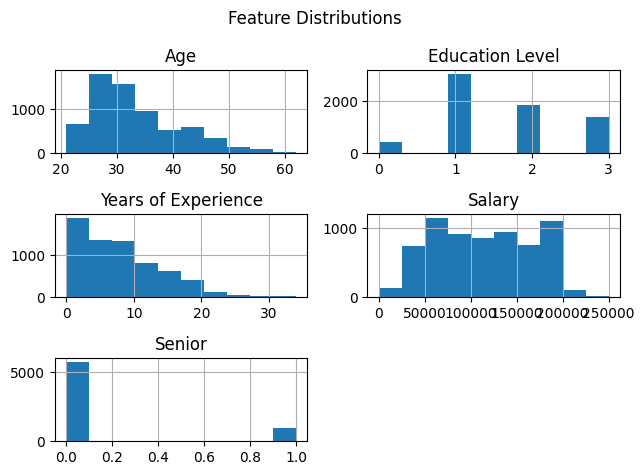

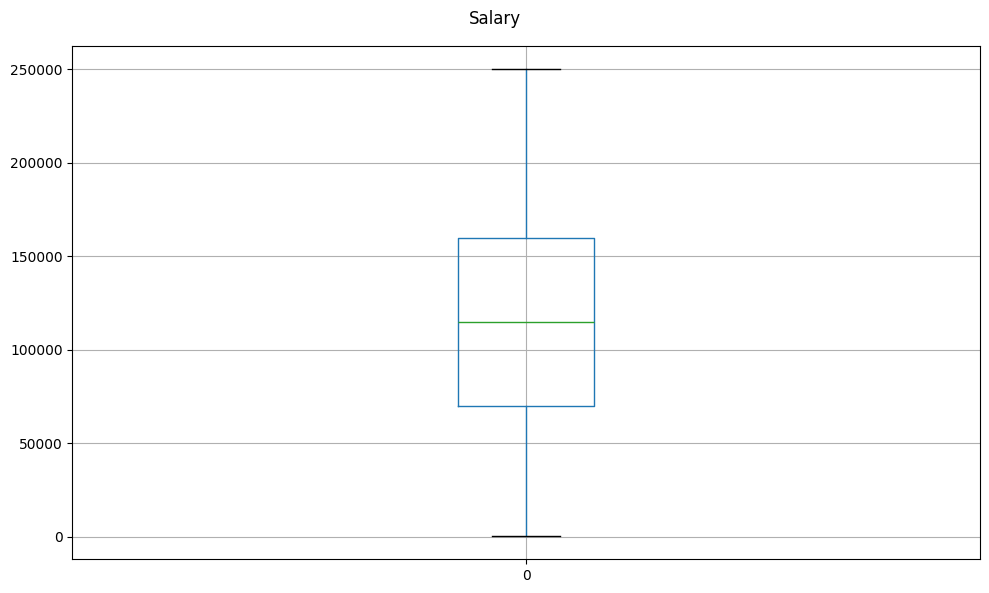

Component Age's lower outliers:
(119,)
Component Years of Experience's lower outliers:
(69,)


In [11]:

# histogram distribution
df.hist()
plt.suptitle(f"Feature Distributions")
plt.tight_layout()
plt.show()

# salary graphed in a different graph because it has larger values
salary = pd.DataFrame(y)
salary.boxplot(figsize=(10, 6))
plt.suptitle(f"Salary")
plt.tight_layout()
plt.show()

# find outliers in data (use code from discussion 1)
col_to_graph =['Age', 'Years of Experience', 'Salary'] # features that had numerical values
for feature in col_to_graph:  # calculate for each of the identified attributes
    q1 = df_encoded[feature].quantile(0.25)
    q3 = df_encoded[feature].quantile(0.75)
    iqr = q3 - q1 #interquartile range: i.e. the box of the boxplot.
    lower_bound = q1 - 1.5 * iqr #lower line.
    upper_bound = q3 + 1.5 * iqr #upper line.
    #modify outliers to values.
    outliers_lower = df_encoded[feature] < lower_bound
    outliers_upper = df_encoded[feature] > upper_bound

    # print the outliers
    if outliers_upper.any():
        print(f"Component {feature}'s lower outliers:\n{df_encoded.loc[outliers_upper, feature].shape}")
    if outliers_lower.any():
        print(f"Component {feature}'s lower outliers:\n{df_encoded.loc[outliers_lower, feature].shape}")

    df_encoded.loc[outliers_lower, feature] = lower_bound
    df_encoded.loc[outliers_upper, feature] = upper_bound

# SPLIT DEPENDENT AND INDEPENDENT VARIABLES

In [12]:
# this ensures salary is not modified during feature selection
X = df_encoded.drop(columns=['Salary'])
y = df_encoded['Salary']

# FEATURE SELECTION

first principal component analysis: 
variance ratios: [9.97274708e-02 7.40291939e-02 7.34956583e-02 6.75013073e-02
 6.62367255e-02 6.33501180e-02 5.20519417e-02 4.67447767e-02
 4.19535196e-02 4.06249900e-02 3.92017776e-02 3.75436276e-02
 3.68571235e-02 3.62373687e-02 3.58505367e-02 3.39558408e-02
 3.34323800e-02 3.30658185e-02 2.59263653e-02 1.67430636e-02
 1.37170201e-02 1.15652355e-02 1.14628956e-02 6.94334010e-03
 1.78190458e-03 1.45372462e-17 1.28621170e-17 1.11638045e-17
 0.00000000e+00]
number of remaining components: 29
total variance ratio: 1.0000000000000002



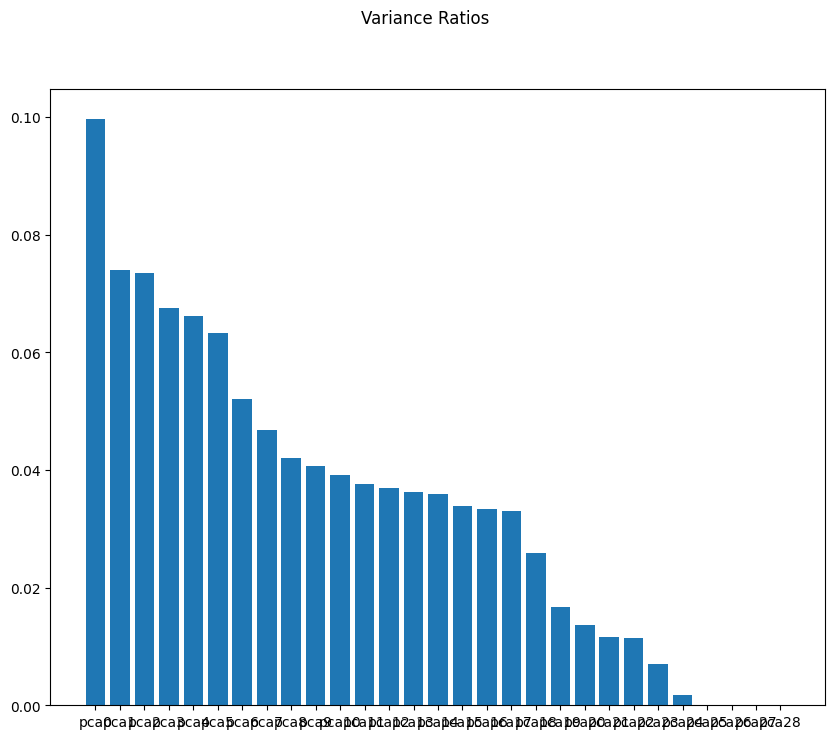



second principal component analysis: 
variance ratios: [0.09972747 0.07402919 0.07349566 0.06750131 0.06623673 0.06335012
 0.05205194 0.04674478 0.04195352 0.04062499 0.03920178 0.03754363
 0.03685712 0.03623737 0.03585054 0.03395584 0.03343238 0.03306582]
number of remaining components: 18
total variance ratio: 0.9118601751926243



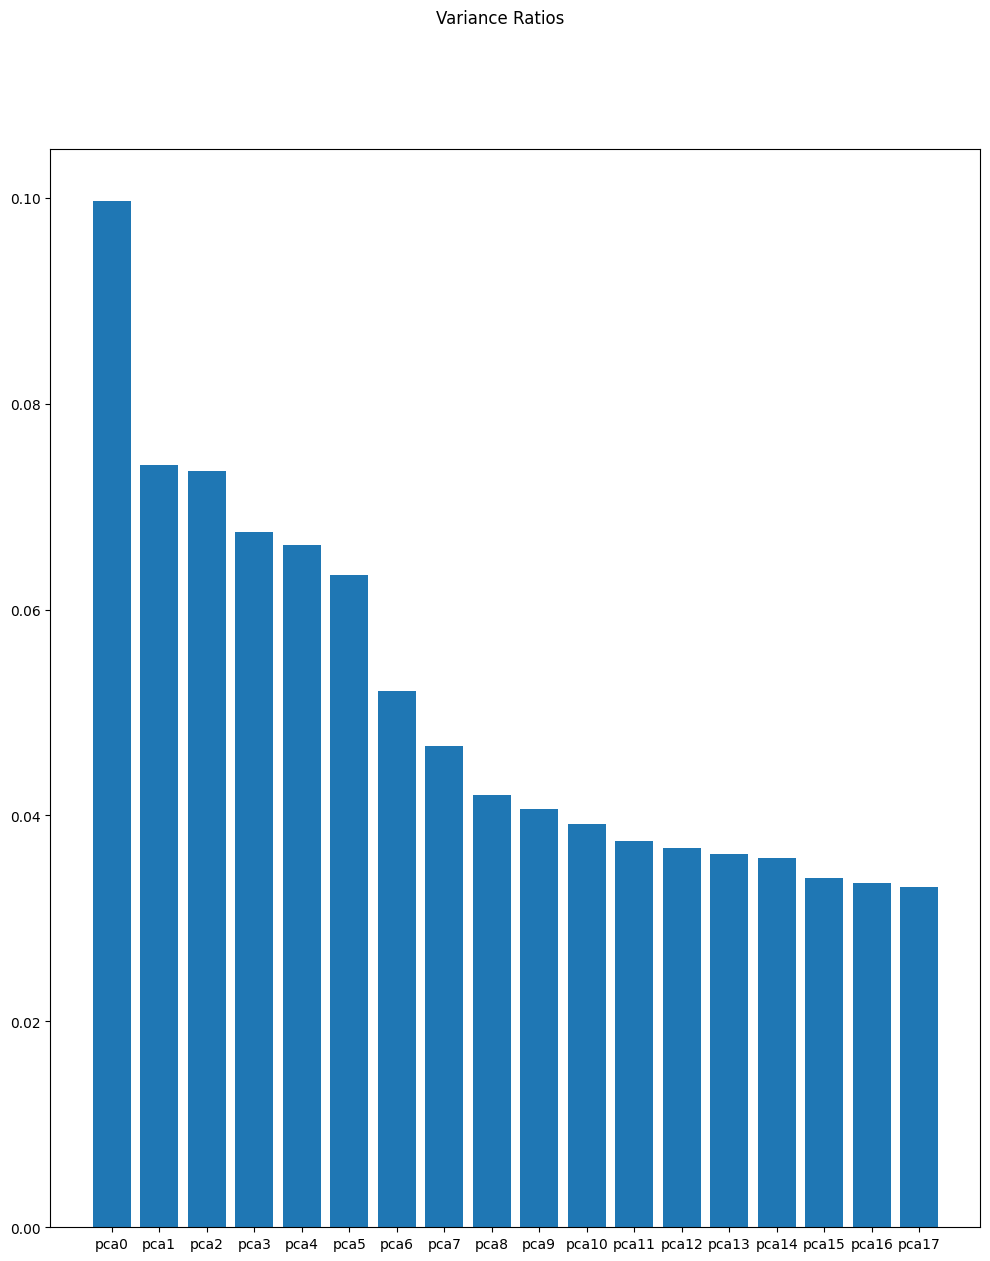

In [13]:
# scale dataset, keep salary the same
scaler = StandardScaler()
X = scaler.fit_transform(X)

# principal component analysis
print("first principal component analysis: ")
# initialize PCA
pca = PCA()

# perform pca on dataset, keep salary the same
X = pca.fit_transform(X)

# print results of pca
print(f"variance ratios: {pca.explained_variance_ratio_}")
print(f"number of remaining components: {len(pca.explained_variance_ratio_)}")

# check if the total variance ratio adds up to 1
total_variance_ratio = 0.0
for ratio in pca.explained_variance_ratio_:
    total_variance_ratio += ratio
print(f"total variance ratio: {total_variance_ratio}")
total_variance_ratio = 0.0
print()

# plot variance ratios
plt.figure(figsize=(10, 8))
plt.bar(pca.get_feature_names_out(), pca.explained_variance_ratio_)
plt.suptitle(f"Variance Ratios")
plt.show()


# some variance ratios are still very close to zero, so manually drop those components
print()
print()
print("second principal component analysis: ")
n = 18

# initialize PCA
pca = PCA(n_components=n)

# perform pca on dataset, keep salary the same
X = pca.fit_transform(X)

# print results of pca
print(f"variance ratios: {pca.explained_variance_ratio_}")
print(f"number of remaining components: {len(pca.explained_variance_ratio_)}")
    
# check if the total variance ratio adds up to 1
total_variance_ratio = 0.0
for ratio in pca.explained_variance_ratio_:
    total_variance_ratio += ratio
print(f"total variance ratio: {total_variance_ratio}")
total_variance_ratio = 0.0
print()

# plot variance ratios
plt.figure(figsize=(12, 14))
plt.bar(pca.get_feature_names_out(), pca.explained_variance_ratio_)
plt.suptitle(f"Variance Ratios")
plt.show()

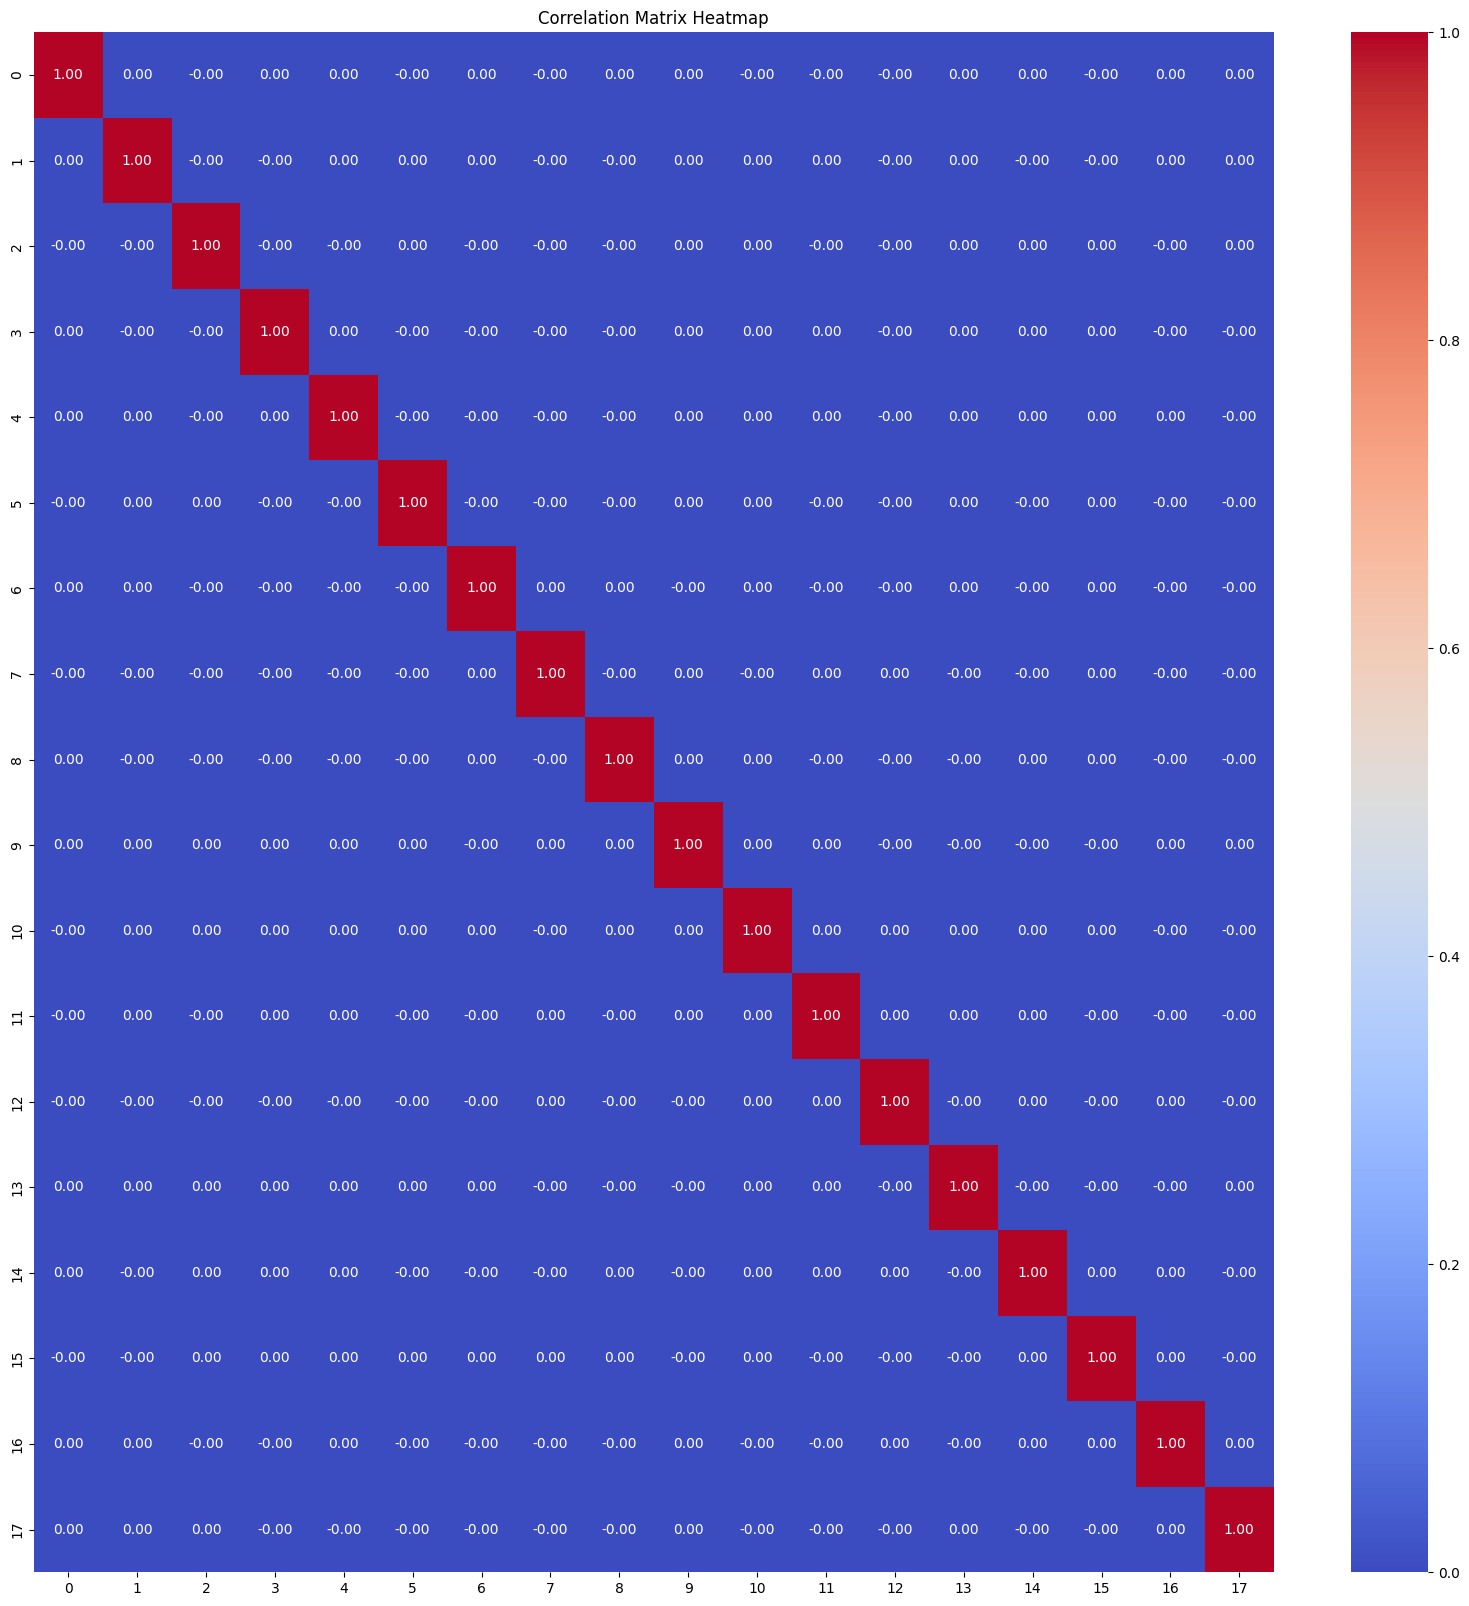

In [14]:
# find correlation (use code from lab 0)
correlation_matrix = np.corrcoef(X.T)
plt.figure(figsize=(20, 20))
plt.title('Correlation Matrix Heatmap')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

# LINEAR MODEL

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# data standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# train model on training data.
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
r2 = r2_score(y_test, y_pred)
print("r2", r2)

bias2 = np.mean((np.mean(y_pred) - y_test) ** 2)
variance = np.mean((y_pred - np.mean(y_pred)) ** 2)
print("Variance: ", variance, " Bias2: ", bias2)

MSE:  843640750.4135907
r2 0.6957691054230675
Variance:  1947812325.7402577  Bias2:  2773515869.94308


In [16]:
def polynomial_regression(degree, X, y, folds, test_size=0.25, random_state=None):
    # Set the polynomial degree of the model
    poly_features = PolynomialFeatures(degree)
    X_poly = poly_features.fit_transform(X)

    # Split data into training and testing sets for this fold
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25, random_state=0)

    # data standardization
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Fit polynomial regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate variance and bias for this fold
    variance = np.mean((np.mean(y_pred)-y_pred)**2)
    bias2 = np.mean((np.mean(y_pred)- y_test) ** 2)

    # Print results for this fold
    print("Variance: {:.4f}, Bias2: {:.4f}, Total error: {:.4f}".format(variance, bias2, bias2 + variance))

    # store mse score of the model applied on the test data
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mse , r2


degrees = range(1, 4)  # polynomial degrees from 1 to 5
mse_list = []
r2_list = []
    
for i in degrees:
    mse, r2 = polynomial_regression(i, X, y, 5)
    mse_list.append(mse)
    r2_list.append(r2)

for i in degrees:  # print mse
    print("Degree:", i, " MSE:", mse_list[i - 1], " r2: ", r2_list[i - 1])

Variance: 1947812325.7403, Bias2: 2773515869.9431, Total error: 4721328195.6833
Variance: 714527327310.6324, Bias2: 3030568001.9752, Total error: 717557895312.6077
Variance: 237738946227114784.0000, Bias2: 38052142807570.6250, Total error: 237776998369922368.0000
Degree: 1  MSE: 843640750.4135906  r2:  0.6957691054230676
Degree: 2  MSE: 710575134598.6365  r2:  -255.2452190189802
Degree: 3  MSE: 2.3777742691232093e+17  r2:  -85746496.26708035


In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Preprocess data
# data standardization
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_test = scalerX.transform(X_test)

# Convert y_train to a NumPy array and reshape
y_train = y_train.to_numpy().reshape(-1, 1)

# Scale the target variable
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train).ravel()
  
# Train model
model = MLPRegressor(hidden_layer_sizes=(64,64), max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred_test = model.predict(X_test)

# Inverse transform y_pred_test back to original scale
y_pred_test = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).ravel()

# Evalute model
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("MSE: ", mse, " r2: ", r2)

MSE:  500462384.11667913  r2:  0.8195249355282105


In [18]:
# random forest (Lab 5)

# Split data into training and testing sets for this fold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Preprocess data
# data standardization
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_test = scalerX.transform(X_test)

# Convert y_train to a NumPy array and reshape
y_train = y_train.to_numpy().reshape(-1, 1)

# Scale the target variable
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train).ravel()
  
n_features = X.shape[1]

# Create a Random Forest model
random_forest = RandomForestRegressor(max_features=math.ceil(math.sqrt(n_features)), n_estimators=8, random_state=42)
random_forest.fit(X_train, y_train)

# Predict and evaluate
y_pred_test = random_forest.predict(X_test)
    
# Inverse transform y_pred_test back to original scale
y_pred_test = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).ravel()
    
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("MSE: ", mse, " r2: ", r2)

MSE:  422546711.4490019  r2:  0.847622623774813


In [ ]:
import pickle

# save model
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

with open('pca.pkl', 'wb') as f:
    pickle.dump(pca, f)

# save trained model
with open('model.pkl', 'wb') as f:
    pickle.dump(random_forest, f)

: 